Embedding = HugguingFaceEmbedding,
text splitter = RecursiveTextSplitter,
vector_store = ChromaDB

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [34]:
data_1 = pd.read_csv('./Results/LLM-testing/result-3/result-3.csv')
data_2 = pd.read_csv('./Results/LLM-testing/result-4/result-4.csv')

Text(0.5, 1.0, 'faithfulness (llama3:8b)')

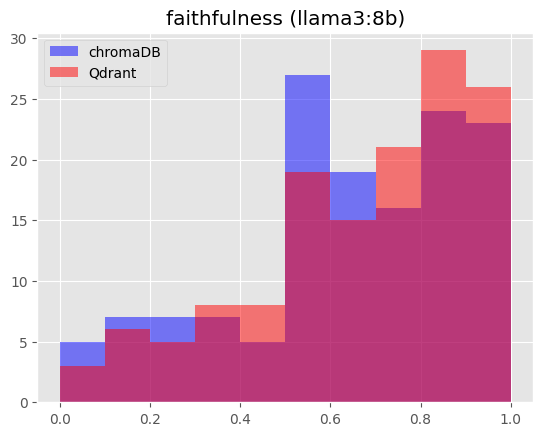

In [35]:
plt.hist(data_1['faithfulness'], fc=(0,0,1,0.5))
plt.hist(data_2['faithfulness'],fc=(1,0,0,0.5))
plt.legend(["chromaDB","Qdrant"])
plt.title("faithfulness (llama3:8b)")

Text(0.5, 1.0, 'answer_correctness (llama3:8b)')

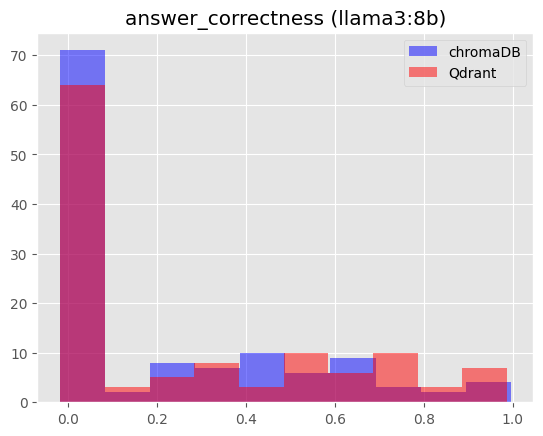

In [36]:
plt.hist(data_1['answer_correctness'], fc=(0,0,1,0.5))
plt.hist(data_2['answer_correctness'],fc=(1,0,0,0.5))
plt.legend(["chromaDB","Qdrant"])
plt.title("answer_correctness (llama3:8b)")

Text(0.5, 1.0, 'answer_relevancy (llama3:8b)')

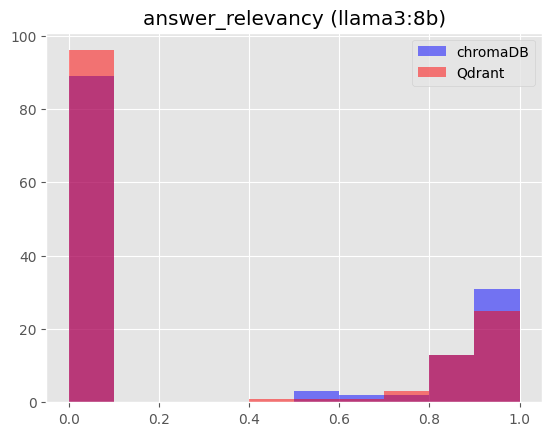

In [37]:
plt.hist(data_1['answer_relevancy'], fc=(0,0,1,0.5))
plt.hist(data_2['answer_relevancy'],fc=(1,0,0,0.5))
plt.legend(["chromaDB","Qdrant"])
plt.title("answer_relevancy (llama3:8b)")